Hussnain Arshad S2022313002

# Data Science QUESTION 2

  
You'll be asked to do some analysis and modeling tasks on a dataset created.  
The dataset concerns a video gaming company that has information on its customers and would like to gain more insights on what drives their customers to play for longer hours.  

The following tables are provided:

In [67]:
import pandas as pd

In [68]:
df_districts_house_prices = pd.read_csv("df_districts_house_prices.csv")
df_person_data = pd.read_csv("df_person_data.csv")
df_person_district = pd.read_csv("df_person_district.csv")

df_person_district

includes information about each customer (person) and the district they live in

- person_id: the person id
- district: the name of the district

In [69]:
df_person_district

,person_id,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool
2,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven
4,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey
...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,Bluffssel
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,Highnantmar
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,Tashnerspool
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,Highnantmar


df_districts_house_prices

includes information about each district and the prices of the houses in the district

- district: the name of the district
- house_price: the price of the house
- house_number: the house number in the district

In [70]:
df_districts_house_prices

,district,house_price,house_number
0,Celowsgan,160652.0,1
1,Celowsgan,159219.0,2
2,Celowsgan,161543.0,3
3,Celowsgan,158944.0,4
4,Celowsgan,164121.0,5
...,...,...,...
1358,El Willong,932441.0,30
1359,El Willong,890190.0,31
1360,El Willong,892096.0,32
1361,El Willong,935117.0,33


df_person_data

includes personal information about each of the customers and relevant information to their video gaming habits

- person_id: identifier for a person
- age: the age of the person
- n_kids: the number of kids this person has
- n_vg: the number of video games the person owns
- n_con: the number of video game consols the person owns
- n_presub: the number of premium subscription the person owns
- n_hours_playing: the total number of hours this person play per month 

In [72]:
df_person_data

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141
...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397


## Quick EDA

The goals of these questions is to evaluate your plotting, data mangling, and plot interpretation skills.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   

### 1. Plot each district's house prices distribution with marking the mean by a vertical line


In [74]:
group_district=  df_districts_house_prices.groupby(['district','house_price']).mean()
group_district

house_number
district  house_price              
Bluffssel 169287.0              7.0
          180790.0             13.0
          181911.0             34.0
          184362.0             21.0
          185752.0             42.0
...                             ...
Wkentown  721725.0             33.0
          724712.0             12.0
          731347.0              1.0
          733969.0              6.0
          800445.0              2.0

[1351 rows x 1 columns]

In [75]:
df_districts_house_prices.nunique()

district          50
house_price     1351
house_number      47
dtype: int64

<ipython-input-76-6c21a3890115>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


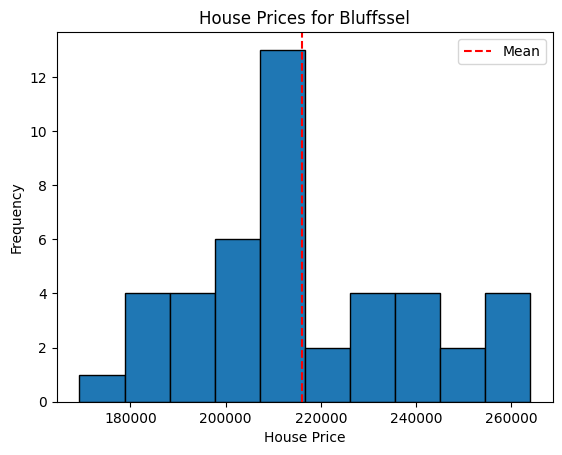

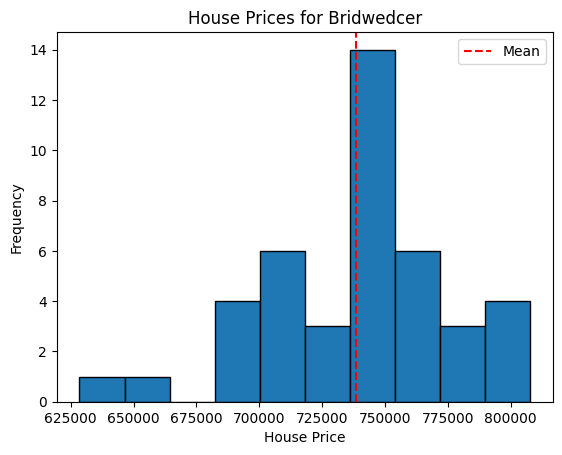

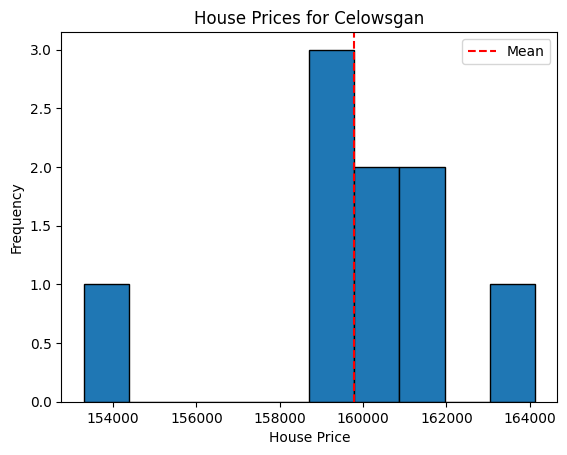

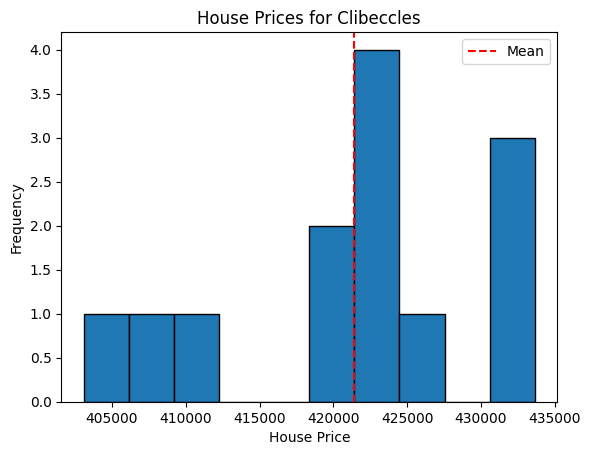

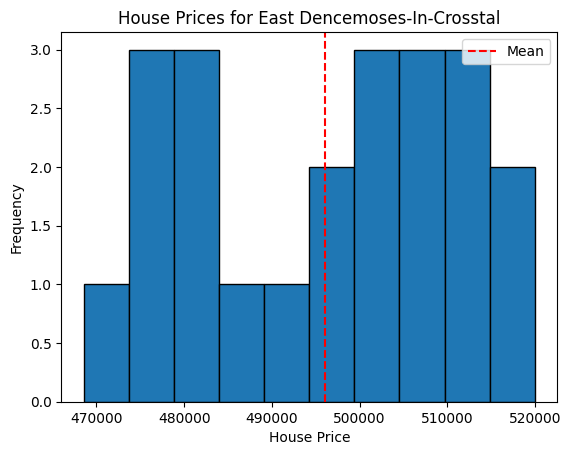

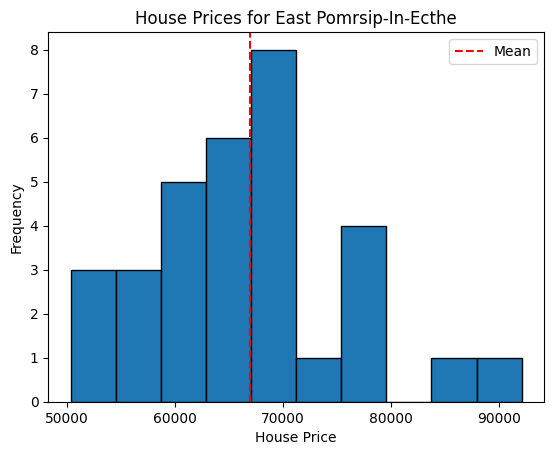

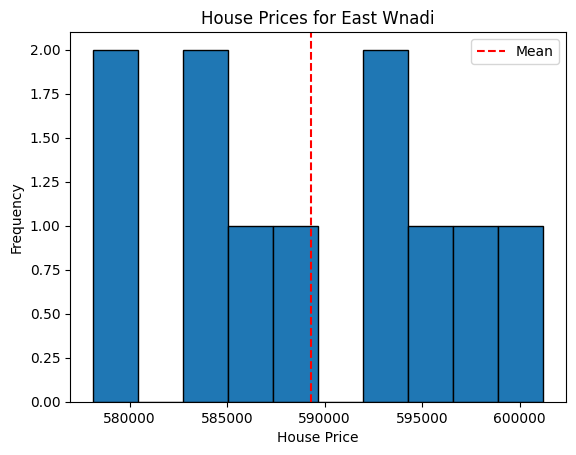

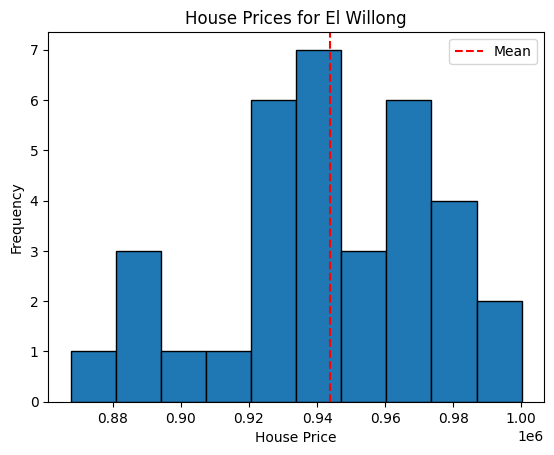

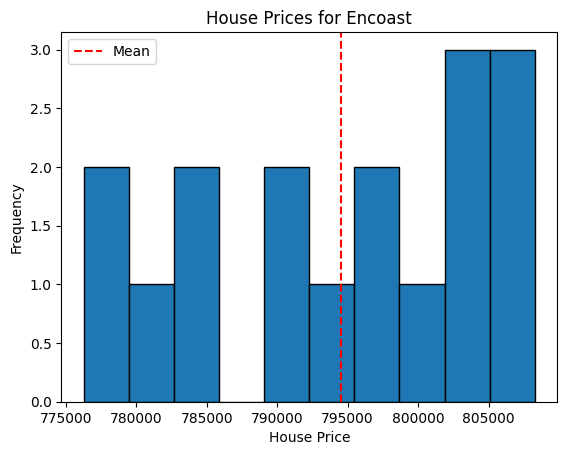

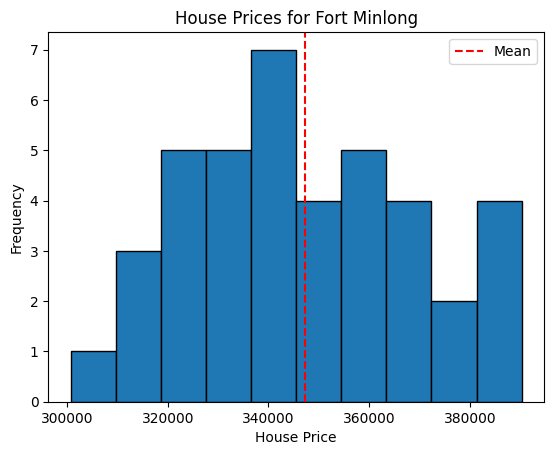

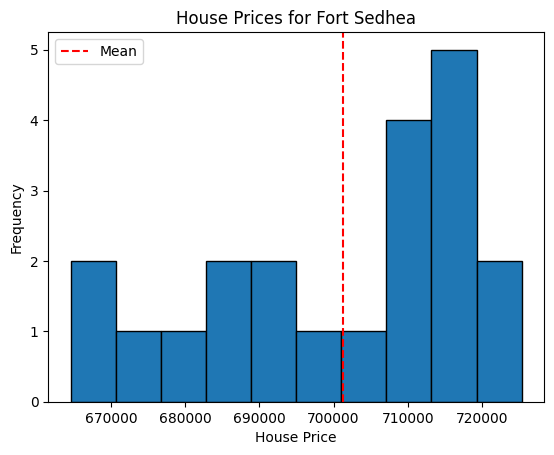

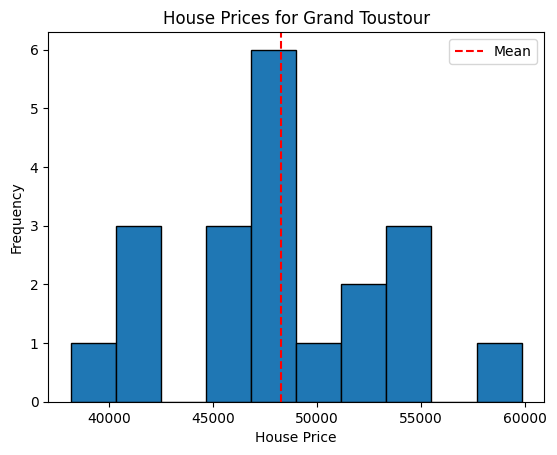

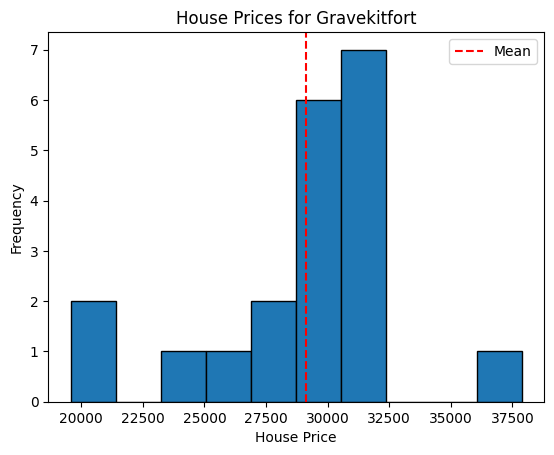

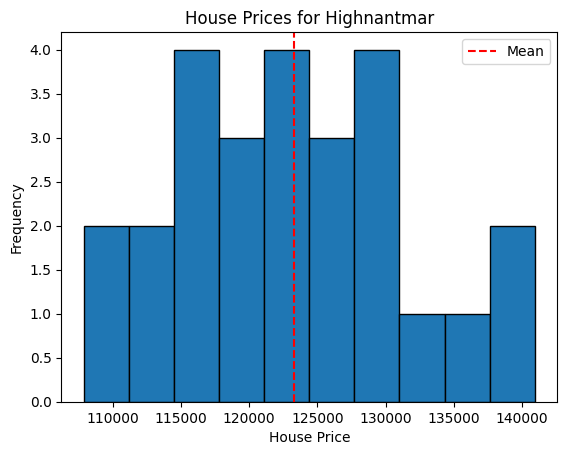

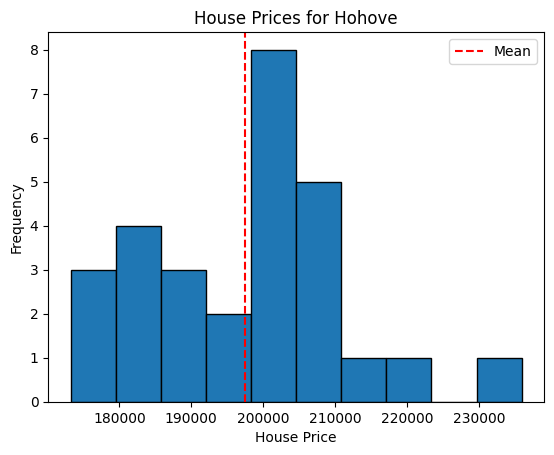

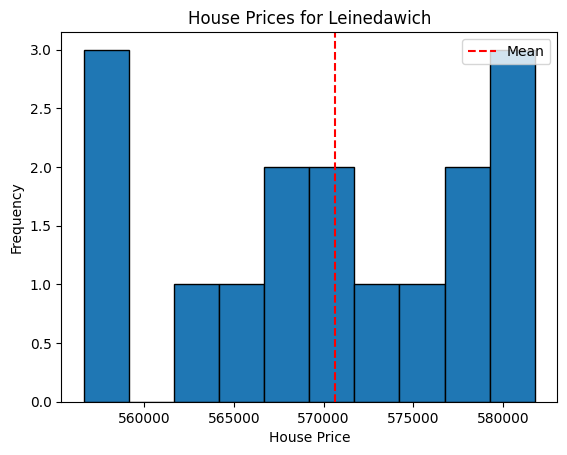

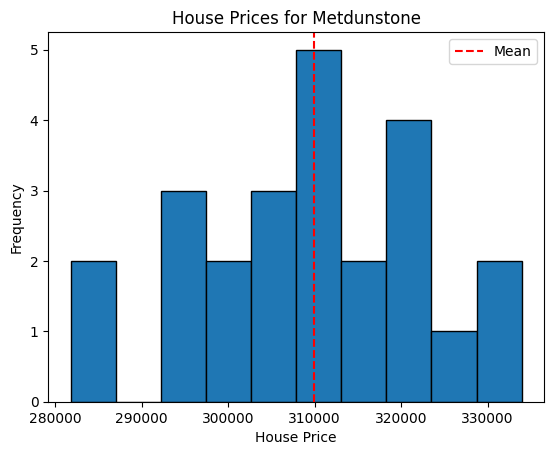

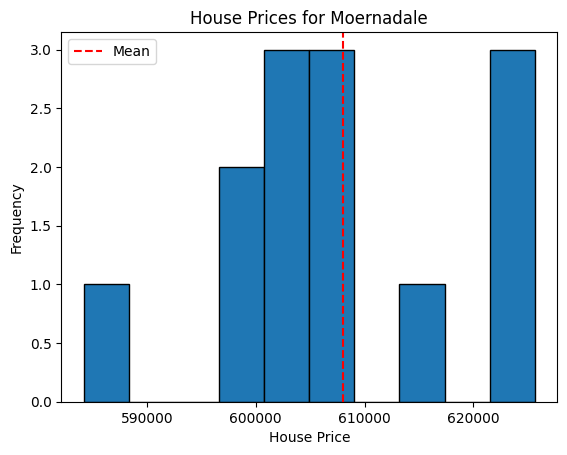

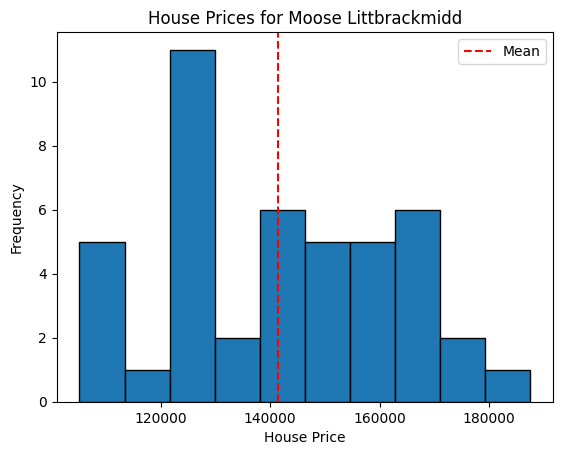

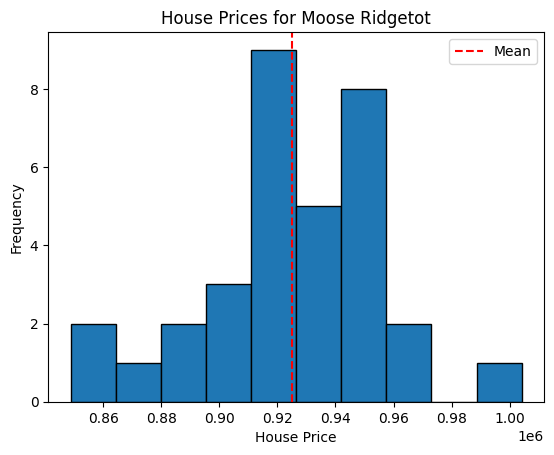

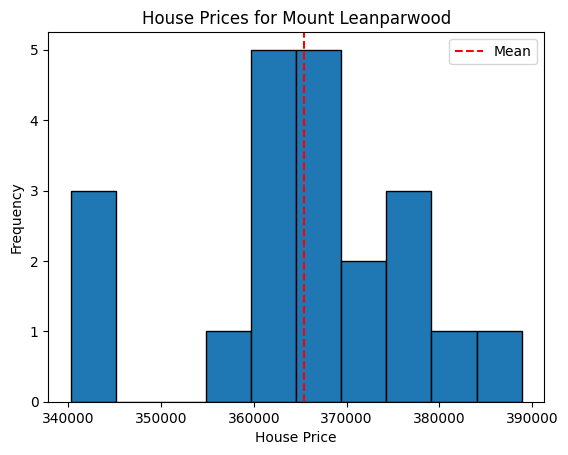

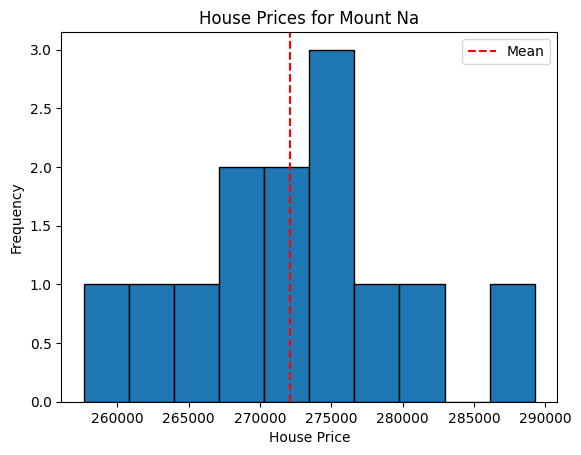

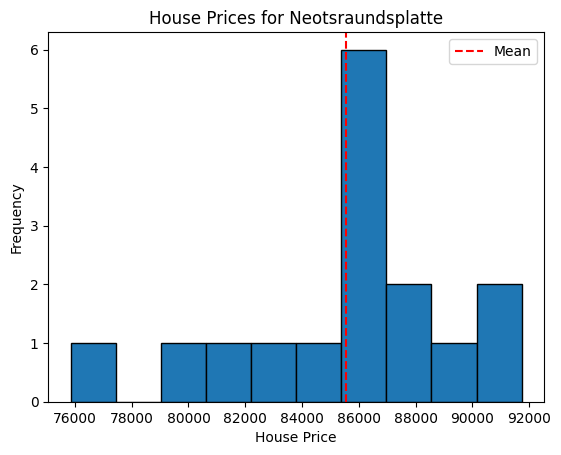

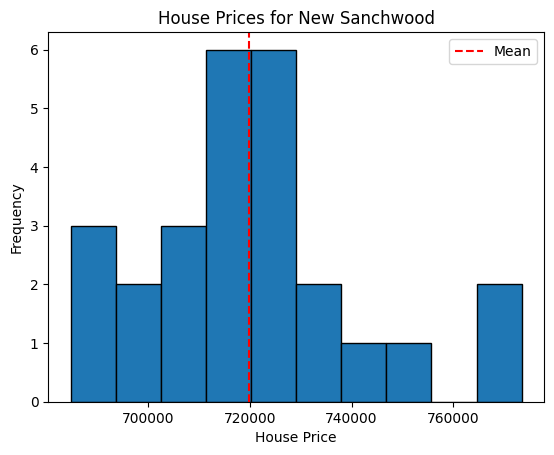

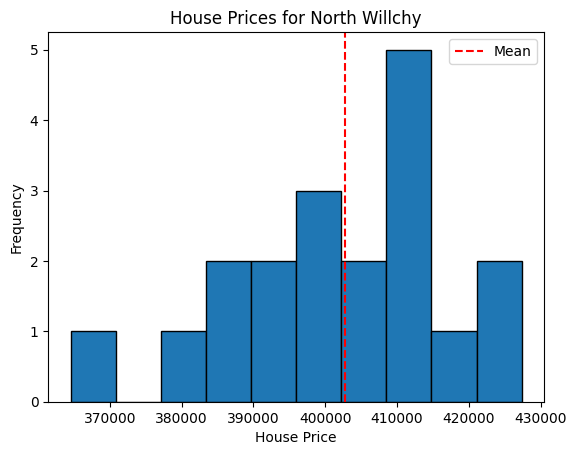

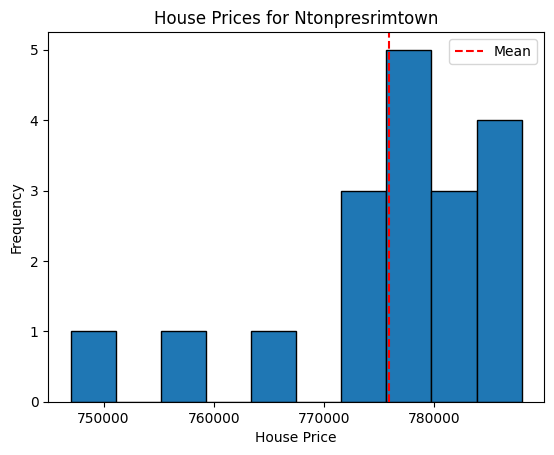

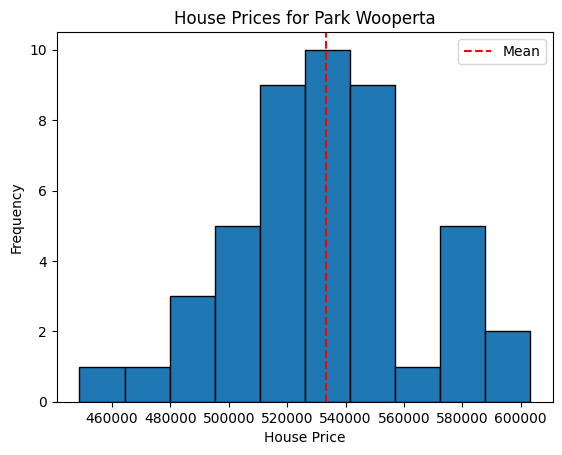

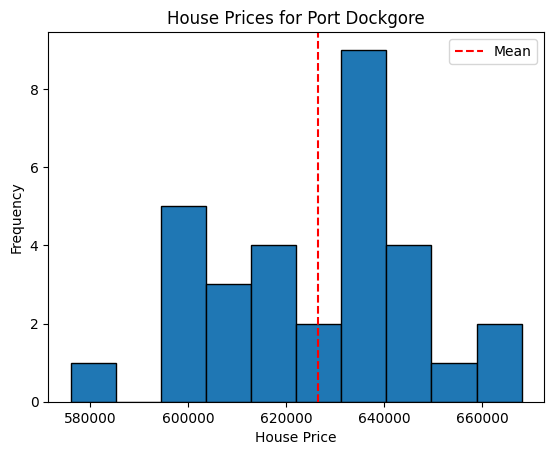

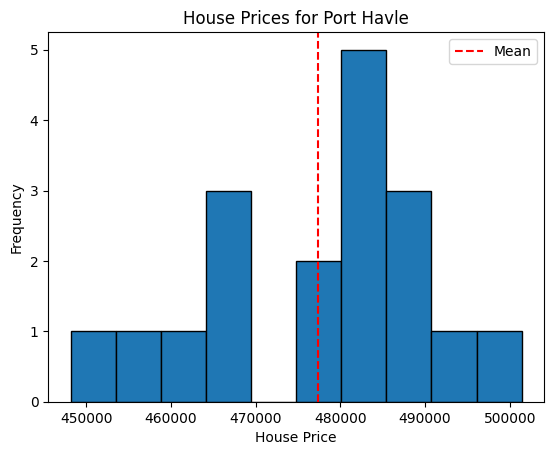

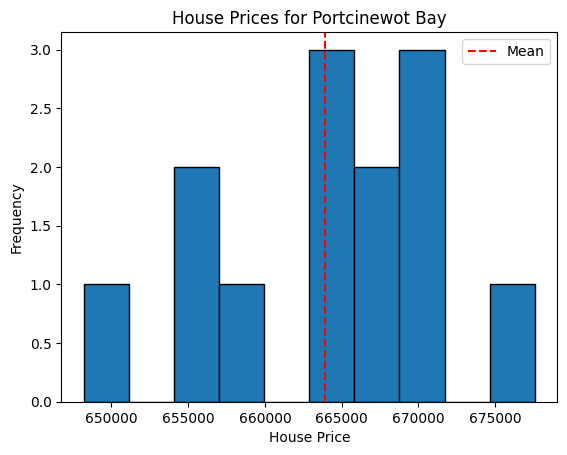

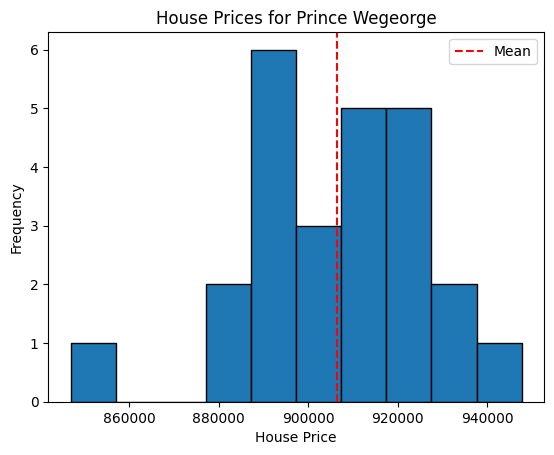

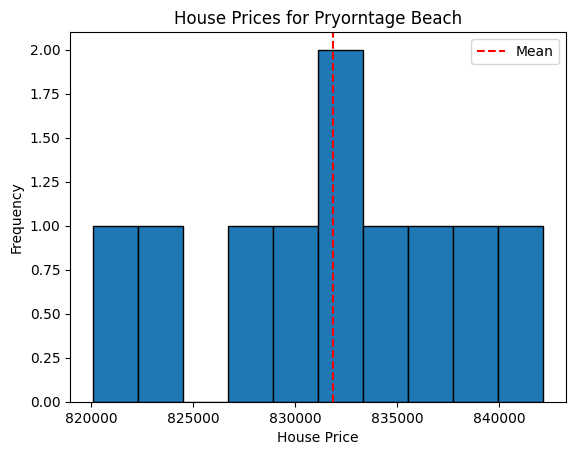

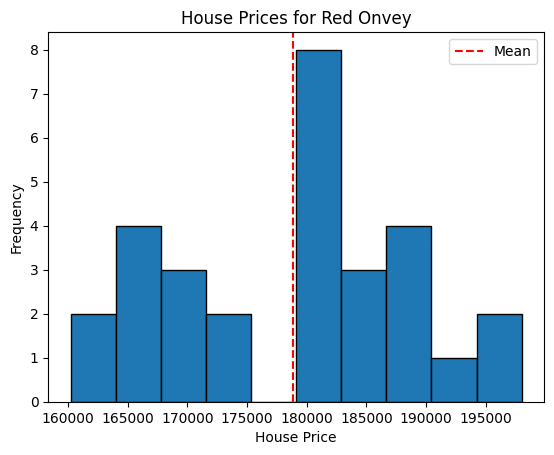

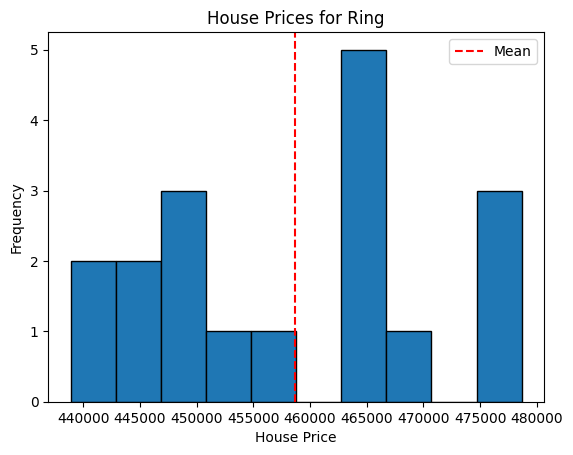

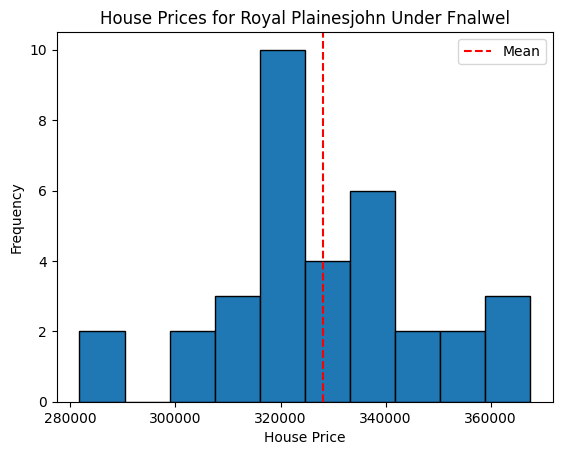

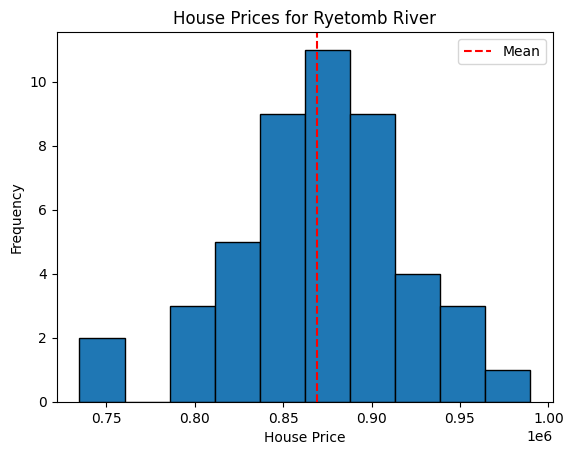

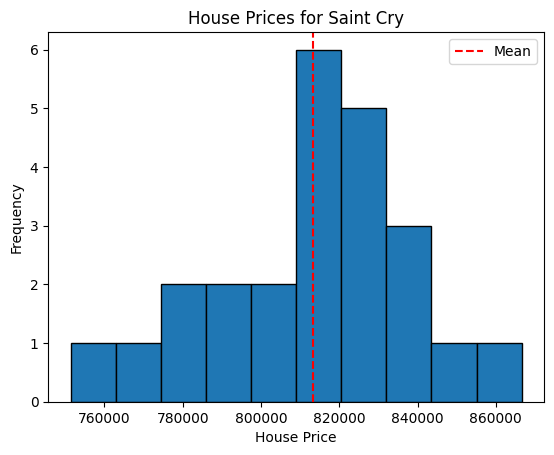

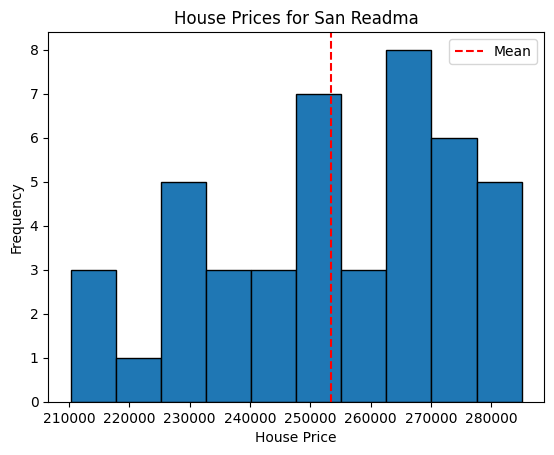

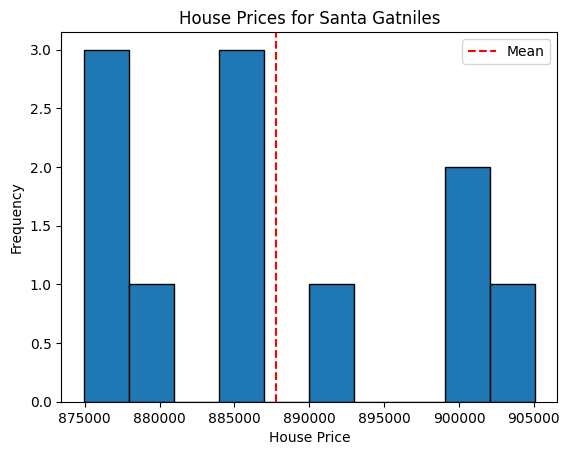

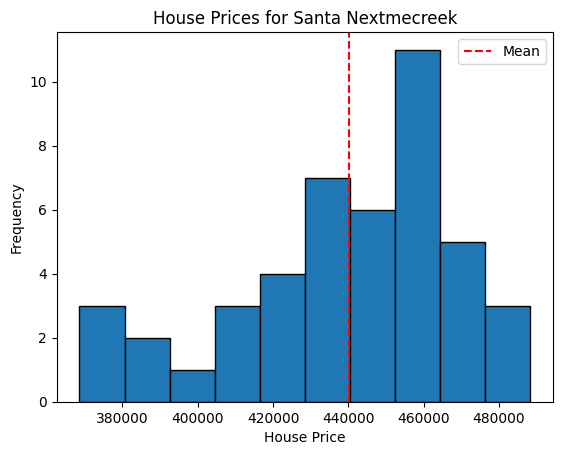

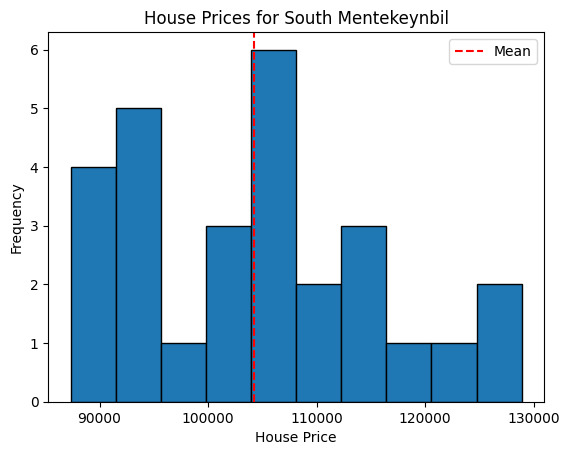

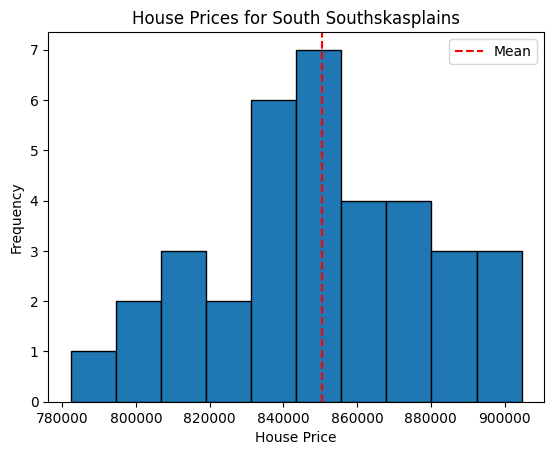

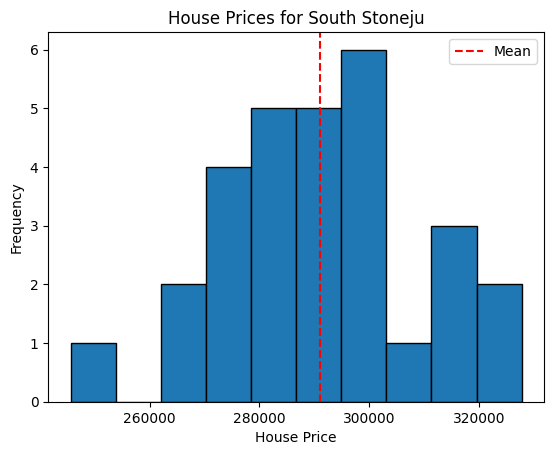

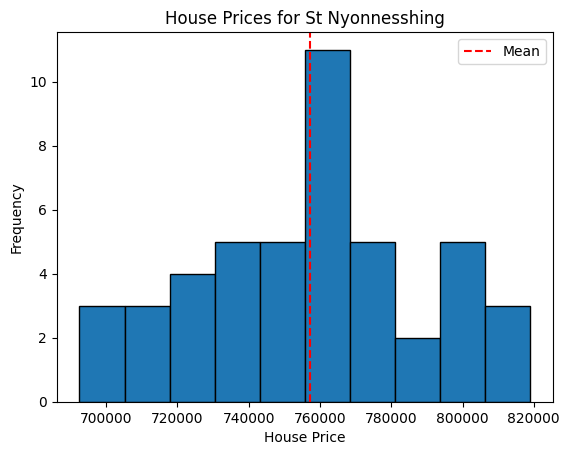

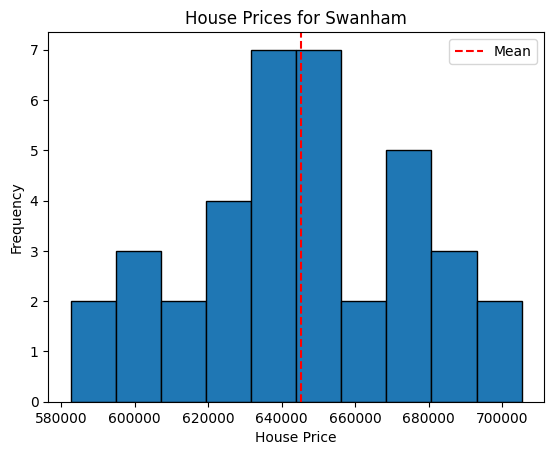

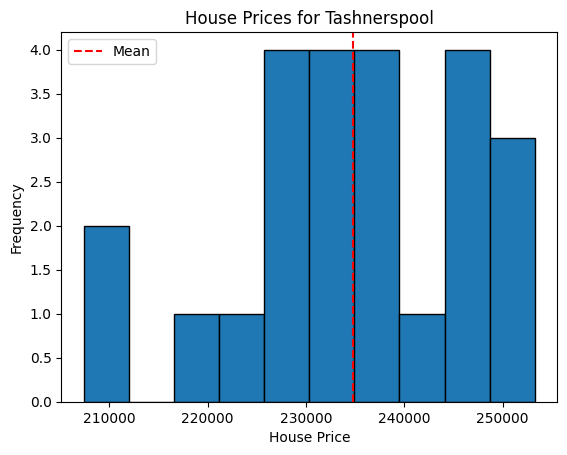

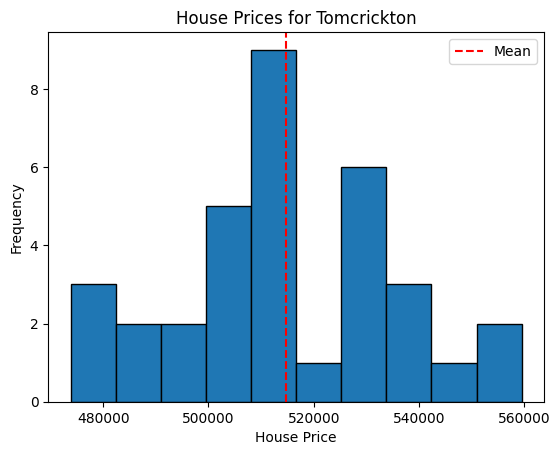

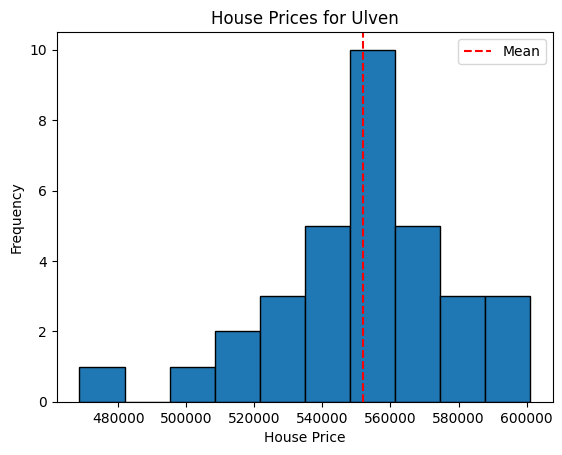

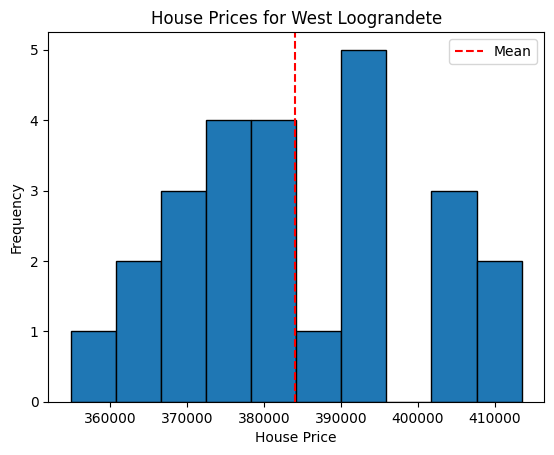

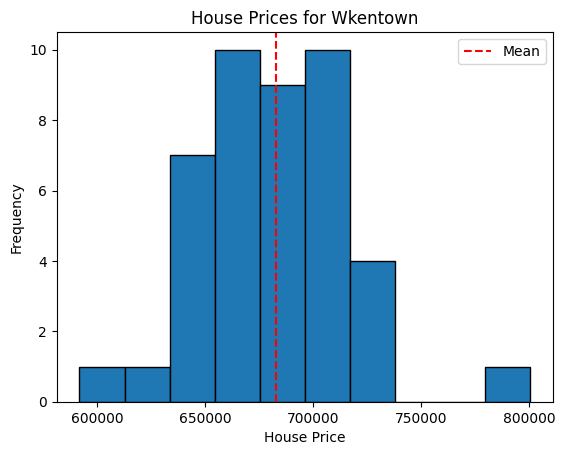

In [76]:
import matplotlib.pyplot as plt

# Iterate over each district group
for district, data in group_district.groupby('district'):
    # Create a new subplot for each group
    plt.figure()
    
    # Get the house prices for the group
    house_prices = data.index.get_level_values('house_price').values
    
    # Calculate the mean house price
    mean_price = house_prices.mean()
    
    # Plot the histogram of house prices
    plt.hist(house_prices,edgecolor='black')
    
    # Add a vertical line to mark the mean
    plt.axvline(mean_price, color='r', linestyle='--', label='Mean')
    
    # Set the labels and title
    plt.xlabel('House Price')
    plt.ylabel('Frequency')
    plt.title('House Prices for {}'.format(district))
    
    # Add a legend
    plt.legend()
    
# Show all the plots
plt.show()

### 2. Combine all of the three data sources into one table to use in further analysis. 

In [88]:
# Merge df_person_district with df_districts_house_prices based on district
merged_data = pd.merge(df_person_district, df_districts_house_prices, on='district', how='inner')

# Merge the merged_data with df_person_data based on person_id
final_table = pd.merge(merged_data, df_person_data, on='person_id', how='inner')

# Print the final combined table
final_table.head(2)

,person_id,district,house_price,house_number,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,323177.0,1,14.0,0,0,0,0,18.422745
1,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,NaN,2,14.0,0,0,0,0,18.422745


### 3. Plot age vs avg house price. What does this plot tell you? (younger people live in more expensive districts)

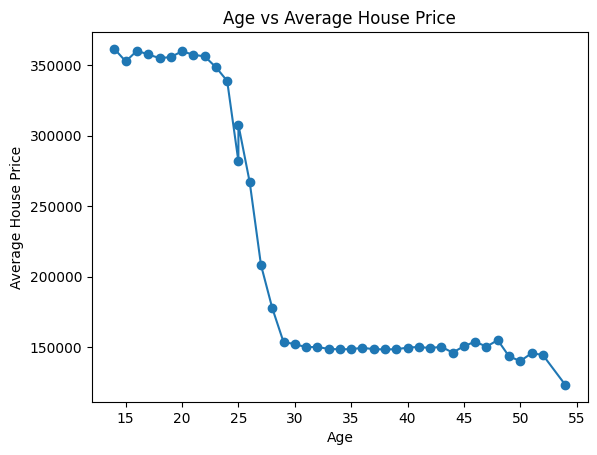

In [94]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'Age' and 'House_Price'

# Group the DataFrame by 'Age' and calculate the average house price
average_price_by_age = final_table.groupby('age')['house_price'].mean()

# Extract the age values and average house price values from the grouped DataFrame
ages = average_price_by_age.index
avg_prices = average_price_by_age.values

# Plot age vs average house price
plt.plot(ages, avg_prices, marker='o', linestyle='-')

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Average House Price')
plt.title('Age vs Average House Price')

# Show the plot
plt.show()

This tells us that more younger people from age 10 to 30 are living in More expensive houses as compared to old age people

## Probability and Statistics:

The goal of these questions is to test your ability to answer probability and stat questions with code.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   


### 1. What's the probability of a customer having 2 kids

Here i am using the original 3 datasets 

In [80]:
# Calculate the total number of customers
total_customers = len(df_person_data)

# Calculate the number of customers who have 2 kids
num_customers_with_2_kids = len(df_person_data[df_person_data['n_kids'] == 2])

# Calculate the probability of a customer having 2 kids
probability = num_customers_with_2_kids / total_customers

print("Probability of a customer having 2 kids:", probability)

Probability of a customer having 2 kids: 0.10017142857142858


### 2. What's the probability of a customer owning more than 10 video games given that they have less than 2 kids

In [81]:
# Filter the DataFrame for customers with less than 2 kids
filtered_df = df_person_data[df_person_data['n_kids'] < 2]

# Calculate the total number of customers with less than 2 kids
total_customers_less_than_2_kids = len(filtered_df)

# Calculate the number of customers with less than 2 kids who own more than 10 video games
num_customers_more_than_10_vg = len(filtered_df[filtered_df['n_vg'] > 10])

# Calculate the probability of a customer owning more than 10 video games given that they have less than 2 kids
probability = num_customers_more_than_10_vg / total_customers_less_than_2_kids

print("Probability of a customer owning more than 10 video games given that they have less than 2 kids:", probability)


Probability of a customer owning more than 10 video games given that they have less than 2 kids: 0.4018363273453094


### 3. Plot the distribution of the number of hours played by customers `n_hours_playing`. Briefly explain what you understand now about the customers' playing hours.

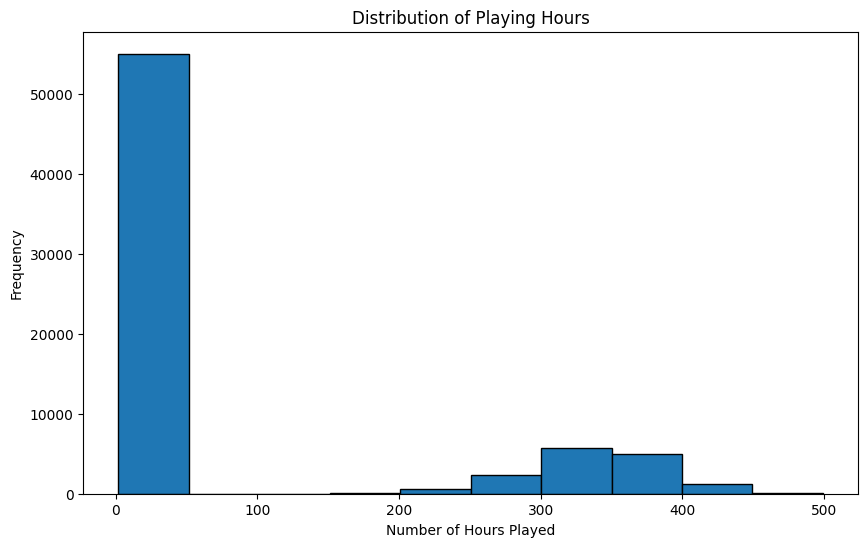

In [82]:
# Plot the distribution of the number of hours played
plt.figure(figsize=(10, 6))
plt.hist(df_person_data['n_hours_playing'], bins=10, edgecolor='black')
plt.xlabel('Number of Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Playing Hours')
plt.show()

As you can see, most customers have a number of hours less than 50 so let's go ahead and remove any values less than 50.  
The distribution of the remaining values look like a normal distribution.  
###  4. Estimate the parameters (mean and std deviation) of this normal distribution computationally.  \
### (Bonus: plot the estimated normal distribution on top of the distribution of `n_hours_playing` after removing values < 50)

In [83]:
import numpy as np
import scipy.stats as stats

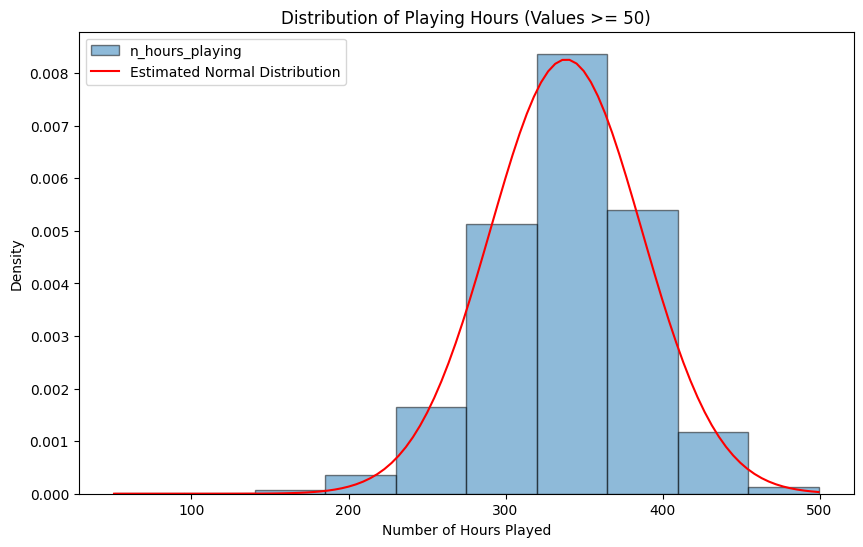

Estimated Mean: 338.54501334662666
Estimated Standard Deviation: 48.2925792379227


In [84]:
# Remove values less than 50
filtered_hours_playing = df_person_data[df_person_data['n_hours_playing'] >= 50]['n_hours_playing']

# Estimate the parameters (mean and standard deviation) of the normal distribution
mean, std_dev = np.mean(filtered_hours_playing), np.std(filtered_hours_playing)

# Create a range of values for the x-axis
x = np.linspace(np.min(filtered_hours_playing), np.max(filtered_hours_playing), 100)

# Compute the probability density function (PDF) for the estimated normal distribution
pdf = stats.norm.pdf(x, mean, std_dev)

# Plot the distribution of n_hours_playing after removing values < 50
plt.figure(figsize=(10, 6))
plt.hist(filtered_hours_playing, bins=10, edgecolor='black', density=True, alpha=0.5, label='n_hours_playing')
plt.plot(x, pdf, color='red', label='Estimated Normal Distribution')
plt.xlabel('Number of Hours Played')
plt.ylabel('Density')
plt.title('Distribution of Playing Hours (Values >= 50)')
plt.legend()
plt.show()

# Print the estimated parameters
print("Estimated Mean:", mean)
print("Estimated Standard Deviation:", std_dev)


# Modeling
The goal of this is to showcase your experimentation and model comparison process.  
The performance of models is not as important as how you compare them and evaluate them against each other.  

Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   
# Apply Different regression model 
# Apply two classffier Model for the data of classfication ( as per your choice)

### 1. Model the number of hours played for each customer. Show your experimentation with failed and successful models.
### 2. Evaluate each experiment using appropriate metrics, cross validation, and plots. Show the predicted vs actual plot.
### 3. Choose the best model for the data

In [104]:
df_person_data.isnull().sum()

person_id          0
age                0
n_kids             0
n_vg               0
n_con              0
n_presub           0
n_hours_playing    0
dtype: int64

In [86]:
# Replace missing values in the "age" column with the mean
df_person_data['age'].fillna(df_person_data['age'].mean(), inplace=True)

In [87]:
df_person_data.isnull().sum()

person_id          0
age                0
n_kids             0
n_vg               0
n_con              0
n_presub           0
n_hours_playing    0
dtype: int64

Regression Model

Linear Regression:
MSE: 3270.287548146351
MAE: 43.769763016014394
R-squared: 0.8163863901527515
Cross-Validation Scores: [0.80916153 0.81377751 0.81397604 0.81469105 0.82183551]

Random Forest Regression:
MSE: 598.7787524773347
MAE: 9.212152337006057
R-squared: 0.9663809598931099
Cross-Validation Scores: [0.9596534  0.96529359 0.96678923 0.96473328 0.96743298]


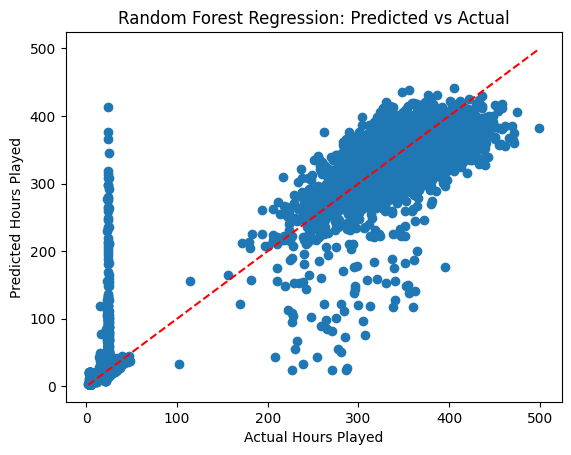

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = df_person_data[['age', 'n_kids', 'n_vg', 'n_con', 'n_presub']]
y = df_person_data['n_hours_playing']

# Step 2: Experiment with regression models
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)

# Model 2: Random Forest Regression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg_predictions = rf_reg.predict(X_test)

# Step 3: Evaluate the experiments
# Evaluate Linear Regression
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
linear_reg_cv_scores = cross_val_score(linear_reg, X, y, cv=5)

# Evaluate Random Forest Regression
rf_reg_mse = mean_squared_error(y_test, rf_reg_predictions)
rf_reg_mae = mean_absolute_error(y_test, rf_reg_predictions)
rf_reg_r2 = r2_score(y_test, rf_reg_predictions)
rf_reg_cv_scores = cross_val_score(rf_reg, X, y, cv=5)

# Compare the performance metrics
print("Linear Regression:")
print("MSE:", linear_reg_mse)
print("MAE:", linear_reg_mae)
print("R-squared:", linear_reg_r2)
print("Cross-Validation Scores:", linear_reg_cv_scores)

print("\nRandom Forest Regression:")
print("MSE:", rf_reg_mse)
print("MAE:", rf_reg_mae)
print("R-squared:", rf_reg_r2)
print("Cross-Validation Scores:", rf_reg_cv_scores)

# Plot predicted vs actual values for the best model
plt.scatter(y_test, rf_reg_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Hours Played')
plt.ylabel('Predicted Hours Played')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.show()


We can see random forrest classiefier is performing better than the linear regression as it has low error and better accuracy

For classification problem i am going to predict how many subscription a person has in df_person_data.

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [105]:
X = df_person_data.drop('n_presub', axis=1)
y = df_person_data['n_presub']


# Step 1: Prepare the data
X = df_person_data[['age', 'n_kids', 'n_vg', 'n_con', 'n_hours_playing']]
y = df_person_data['n_presub']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


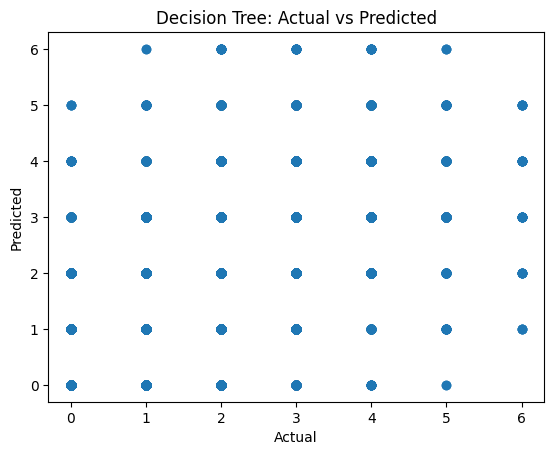

In [107]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)

# Plot predicted vs actual
plt.scatter(y_test, dt_predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs Predicted')
plt.show()


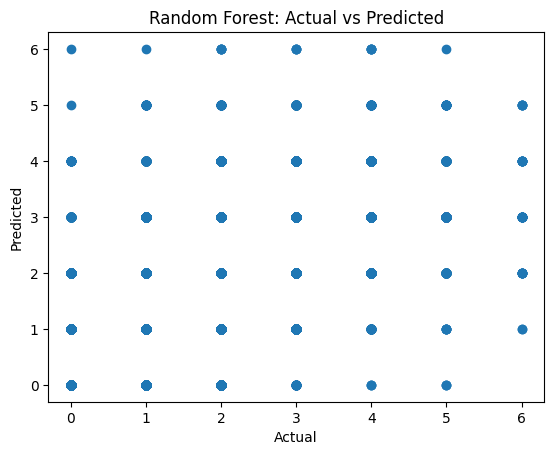

In [109]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

# Plot predicted vs actual
plt.scatter(y_test, rf_predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.show()


In [110]:
print("Decision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Cross Validation Scores:", dt_cv_scores)
print("Confusion Matrix:\n", dt_confusion_matrix)
print("Classification Report:\n", dt_classification_report)

print("\nRandom Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Cross Validation Scores:", rf_cv_scores)
print("Confusion Matrix:\n", rf_confusion_matrix)
print("Classification Report:\n", rf_classification_report)


Decision Tree Classifier:
Accuracy: 0.4105714285714286
Cross Validation Scores: [0.40528571 0.41192857 0.40928571 0.408      0.41278571]
Confusion Matrix:
 [[2533  984  227   74   13    4    0]
 [ 962  984  760  393   72   31    2]
 [ 223  721 1282  903  174   74   14]
 [  97  449  944  740  214   95   15]
 [  13   57  154  217  174   77   12]
 [   2   22   47  100   61   35    3]
 [   0    4    8   13   10    7    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      3835
           1       0.31      0.31      0.31      3204
           2       0.37      0.38      0.38      3391
           3       0.30      0.29      0.30      2554
           4       0.24      0.25      0.24       704
           5       0.11      0.13      0.12       270
           6       0.00      0.00      0.00        42

    accuracy                           0.41     14000
   macro avg       0.29      0.29      0.29     14000
weighted av

Random forest performed better than decision tree as it has more accuracy than the decision tree classifier